# Исследование закономерностей игровой индустрии влияющих на успешность продаж

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
<br><br>
__Описание данных__
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br><br>Данные за 2016 год могут быть неполными.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# Читаем файл

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Выведем основную информацию о датафрейме с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Судя из увиденных данных, необходимо провести предобработку: привести названия столбцов к нижнему регистру, заполнить пропуски, поменять тип данных, изучить уникальные значения и устранить дубликаты, если они есть.

### Предобработка данных

In [4]:
# Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [5]:
# А также приведем значения в некоторых столбцах к нижнему регистру
for column in data[['name', 'platform', 'genre', 'rating']]:
    data[column] = data[column].str.lower()

In [6]:
# Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков в колонках' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')      

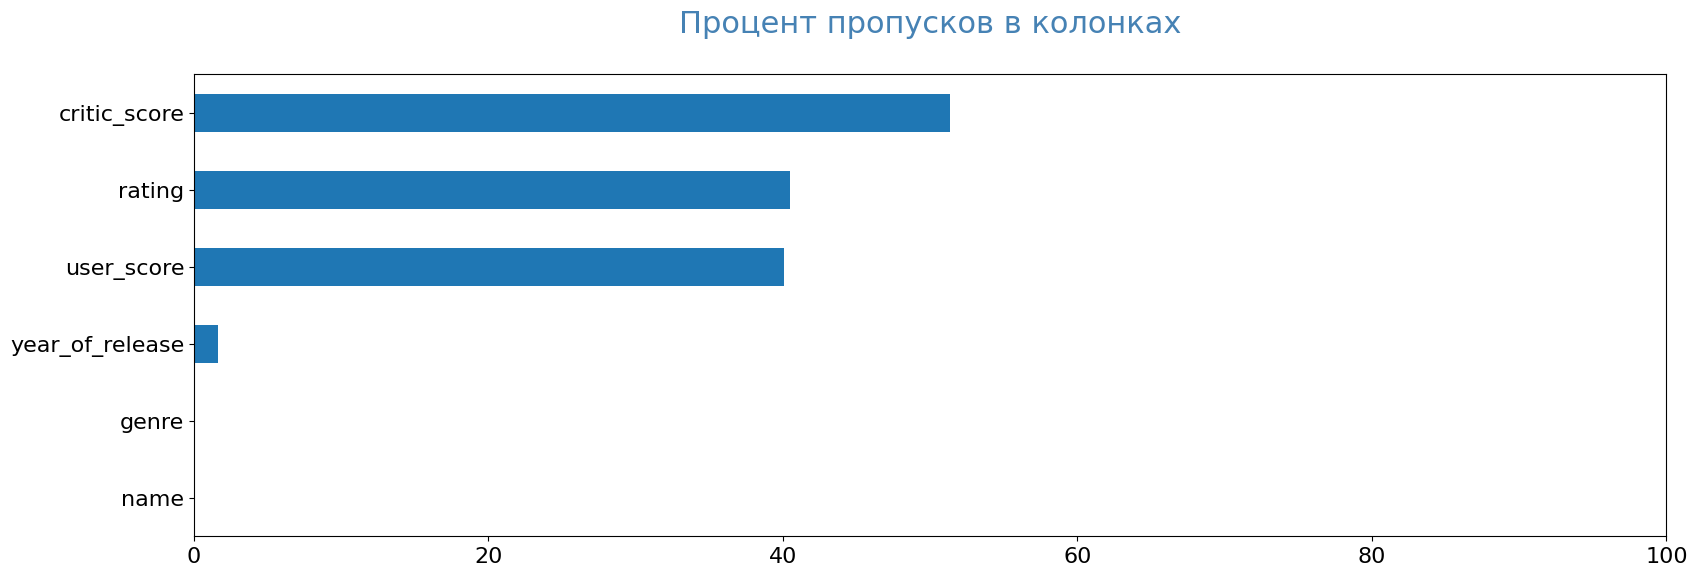

In [8]:
pass_value_barh(data)
plt.xlim(0, 100);

In [9]:
# Посмотрим количество явных дубликатов, используя комбинацию двух методов
data.duplicated().sum()

0

__Что будем делать, судя из увиденных данных:__

      Column           Dtype    None 
    name              object       2 - пропусков мало, на анализ не повлияет, удалим
    year_of_release   float64    269 - поменяем на тип данных Int64, посмотрим, возможно ли заполнить пропуски
    genre             object       2 - посмотрим, возможно ли заполнить пропуски по столбцу name
    critic_score      float64   8578 - скорее всего поменяем на тип данных Int64, т.к. есть вероятность, что это 
                                       целые числа; большое количество пропусков, посмотрим, но скорее всего оставим
                                       пропуски, анализу не помешают
    user_score        object    6701 - поменяем на тип данных float; большое количество пропусков, посмотрим, 
                                       но скорее всего оставим пропуски, анализу не помешают
    rating            object    6766 - большое количество пропусков, необходим анализ

 Посмотрим на пропуски в столбце `name` и сравним их со столбцом `genre`. 
 Есть вероятность, что это одни и те же пропуски, т.к. и там и там пропущено по 2 значения

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Так и есть, удалим их
data.dropna(subset=['name'], inplace=True)
data.reset_index(drop= True , inplace= True)   # сбросим индексы

Поищем дубликаты по ключевым столбцам и удалим их, если они есть

In [12]:
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
16228,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


In [13]:
# Удалим вторую строчку дубликат по индексу, в ней отсутствуют данные по продажам
data = data.drop(index=16228)
data.reset_index(drop= True , inplace= True)   # сбросим индексы

In [14]:
# Поменяем год выпуска на тип данных Int64
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [15]:
# Посмотрим уникальные значения в столбце critic_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
# Теория подтвердилась, только целые числа, поменяем на тип данных Int64
data['critic_score'] = data['critic_score'].astype('Int64')

In [17]:
# Посмотрим уникальные значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выяснил в интернете, что обозначает аббревиатура __tbd__.<br>
__tbd__ - от английского *To Be Determined* (будет определено) или *To Be Decided* (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [18]:
# Заменим значение tbd на NaN и поменяем тип данных на float
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

In [19]:
# check
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3do,1994,1995,1
3ds,2011,2016,5
dc,1998,2008,10
ds,1985,2013,28
gb,1988,2001,13
gba,2000,2007,7
gc,2001,2007,6
gen,1990,1994,4


Сделаем срез по платформе __2600__ и посмотрим пропуски в годах выпуска игр.

In [20]:
data.query('platform == "2600"').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
89,pac-man,2600,1982,puzzle,7.28,0.45,0.0,0.08,<NA>,NaN,NaN
240,pitfall!,2600,1981,platform,4.21,0.24,0.0,0.05,<NA>,NaN,NaN
262,asteroids,2600,1980,shooter,4.00,0.26,0.0,0.05,<NA>,NaN,NaN
546,missile command,2600,1980,shooter,2.56,0.17,0.0,0.03,<NA>,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.0,0.03,<NA>,NaN,NaN
735,frogger,2600,1981,action,2.06,0.12,0.0,0.02,<NA>,NaN,NaN
772,demon attack,2600,1981,shooter,1.99,0.12,0.0,0.02,<NA>,NaN,NaN
865,e.t.: the extra terrestrial,2600,1981,action,1.84,0.11,0.0,0.02,<NA>,NaN,NaN
1107,ms. pac-man,2600,1981,puzzle,1.54,0.10,0.0,0.02,<NA>,NaN,NaN
1118,dig dug,2600,1982,puzzle,1.52,0.10,0.0,0.02,<NA>,NaN,NaN


Есть пропуск в дате выхода на этой платформе игры ***Space Invaders***. Посмотрим на каких платформах и в каке года эта игра еще выпускалась.

In [21]:
data.query('name == "space invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
4263,space invaders,snes,1994,shooter,0.00,0.00,0.46,0.00,<NA>,NaN,NaN
8579,space invaders,n64,1999,shooter,0.13,0.03,0.00,0.00,<NA>,NaN,NaN
10382,space invaders,gba,2002,shooter,0.08,0.03,0.00,0.00,<NA>,NaN,NaN


Данная игра выпускалась еще на 3-х платформах с 1994 по 2002 года. Погуглив я выяснил, что платформа __2600__ существовала до 1992 года, соответственно на этой платформе данная игра выходила еще раньше. Поэтому заполнить пропуски в столбце `year_of_release` по названию игр не получится, чтобы не было неверно установленого года выпуска. Пропусков не много, просто удалим. 
<br>Пропуски скорее всего возникли по причине человеческого фактора (забыли или не успели заполнить) или о дате выхода игры нет точных данных.

In [22]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(drop= True , inplace= True)   # сбросим индексы

In [23]:
# Проверим столбцы платформы и жанра на неявные дубликаты
display(data['platform'].unique())
data['genre'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Здесь все в порядке.

In [24]:
# Посмотрим уникальные значения и их количество в столбце рейтинга
data['rating'].value_counts()

e       3920
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

В Википедии ([ссылка на сайт](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)) познакомился поближе с аббревиатурами рейтингов и что они значат.<br><br>
__Рейтинги:__<br>
«EC» («Early childhood») — «Для детей младшего возраста»<br>
«E» («Everyone») — «Для всех»<br>
«K-A» («Kids to Adults») — «Для детей и взрослых»<br>
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет<br>
«T» («Teen») — «Подросткам»<br>
«M» («Mature») — «От 17 лет»<br>
«AO» («Adults Only 18+») — «Только для взрослых»<br>
«RP» («Rating Pending»») — «Рейтинг ожидается»<br>

Так как количество игр с рейтингами «EC», «K-A», «RP» и «AO» минимально, то я решил их объединить с подходящими рейтингами по смыслу.<br>
Поменяем на «E» игры с рейтингами «K-A» (дети от 6 лет), т.к. ранее игры с рейтингом «E» носили этот рейтинг, и «EC» (для детей от 3-х лет), в принципе подходят.<br>
«AO» поменяем на «M», а «RP» заменим на *NaN*.

In [25]:
data['rating'] = data['rating'].replace('ec', 'e')
data['rating'] = data['rating'].replace('k-a', 'e')
data['rating'] = data['rating'].replace('ao', 'm')
data['rating'] = data['rating'].replace('rp', np.nan)

data['rating'].value_counts()   # Посмотрим результат

e       3931
t       2905
m       1537
e10+    1393
Name: rating, dtype: int64

Посмотрим по уникальным названиям игр отличается ли рейтинг у одной и той же игры и на основании этого сделаем вывод, сможем ли мы заполнить пропуски в столбце `rating`.

In [26]:
data['name'].value_counts().head()

need for speed: most wanted    12
fifa 14                         9
lego marvel super heroes        9
ratatouille                     9
monopoly                        8
Name: name, dtype: int64

In [27]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,need for speed: most wanted,ps2,2005,racing,2.03,1.79,0.08,0.47,82,9.1,t
519,need for speed: most wanted,ps3,2012,racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN
1177,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,t
1574,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,t
1976,need for speed: most wanted,xb,2005,racing,0.53,0.46,0.00,0.05,83,8.8,t
2025,need for speed: most wanted,psv,2012,racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN
3531,need for speed: most wanted,gc,2005,racing,0.43,0.11,0.00,0.02,80,9.1,t
5883,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,82,8.5,t
6177,need for speed: most wanted,wiiu,2013,racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN
6310,need for speed: most wanted,ds,2005,racing,0.24,0.01,0.00,0.02,45,6.1,e


На срезе игры ***Need for Speed: Most Wanted*** видно, что данная игра имеет 2 рейтинга («E» и «T») и пропуски. Рейтинг разница на разных платформах и поэтому заполнять пропуски каким-либо из этих вариантов будет не правильно, чтобы это не повлияло на дальнейший анализ.<br> <br>
__Entertainment Software Rating Board (ESRB)__ — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде, основанная в 1994 году. Поэтому пропуски до этого года объяснимы, а далее можно предположить, что рейтинг еще не присвоен или не успели присвоить, либо как обычно человеческий фактор (забыли или не успели заполнить).
<br>Заполним пропуски значением **неопределен**.

In [28]:
# Заменим пропуски на undefiend
data["rating"] = data['rating'].fillna('undefined')

__Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.__

In [29]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38


__Снова посмотрим общие данные и подведем итог.__

In [30]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

__Что получили по итогу:__

      Column           Dtype    None 
    name              object       0 - пропуски удалили
    year_of_release   Int64        0 - поменяли на тип данных Int64, пропуски удалили 
    genre             object       0 - заполнить пропуски по столбцу name не удалось, удалили   
    critic_score      Int64     8461 - поменяли на тип данных Int64, пропуски оставили, анализу не помешают
    user_score        float64   8981 - поменяли на тип данных float; выбивающиеся значения заменили на пропущенные, 
                                       пропуски оставили, анализу не помешают
    rating            object       0 - некоторые категории заменили на похожие, в силу малого количества; 
                                       пропуски заменили на заглушку
    total_sales       float64      0 - добавили новый столбец с общей суммой продаж во всех регионах
    
Отсутствие оценок в колонках `critic_score` и `user_score` можно объяснить тем, что игру еще не оценили (недавно вышла) или просто нет оценки.   

__Теперь, используя эти данные, можно провести анализ исходя из поставленных задач.__

### Проведем исследовательский анализ данных

#### __Посмотрим, сколько игр выпускалось в разные годы.__

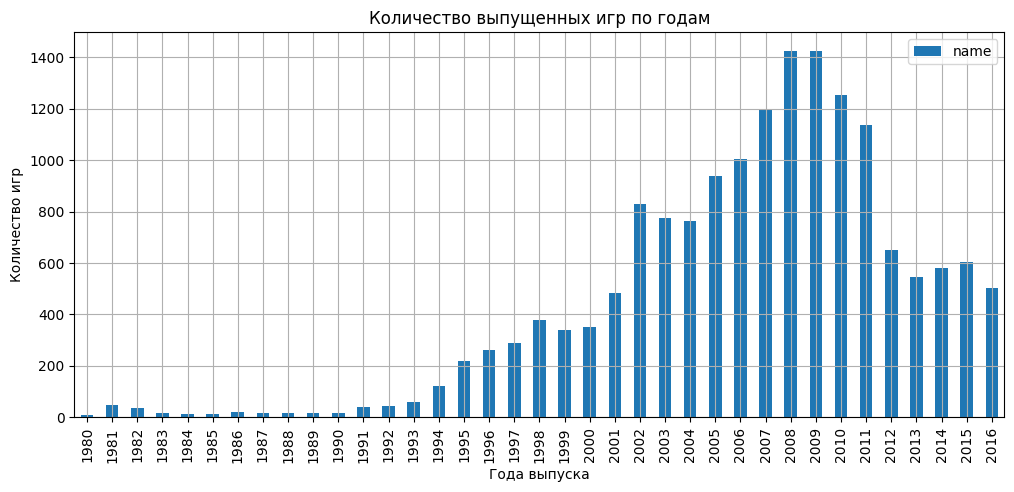

In [31]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind = 'bar', grid=True, figsize=(12, 5))
)
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Года выпуска")
plt.ylabel("Количество игр")
plt.show();

Из графика видим, что до 1994 года выпуск игр был минимальным. С развитием компьтерных технологий и их доступности массовому потребителю пошел рост в разработке и выпуске игр. Самый высокий отрезок выпуска игр приходится с 2002 по 2011 года, пик 2008 - 2009 года. Оно и понятно: развитие компьютерных технологий, скоростного интернета, социальных сетей. С развитием мобильных устройств пошел спад выпуска игр с 2012 года, т.к. интерес потребителя стал склоняться в сторону мобильных приложений и игр.

#### __Посмотрим, как менялись продажи по платформам.__ 

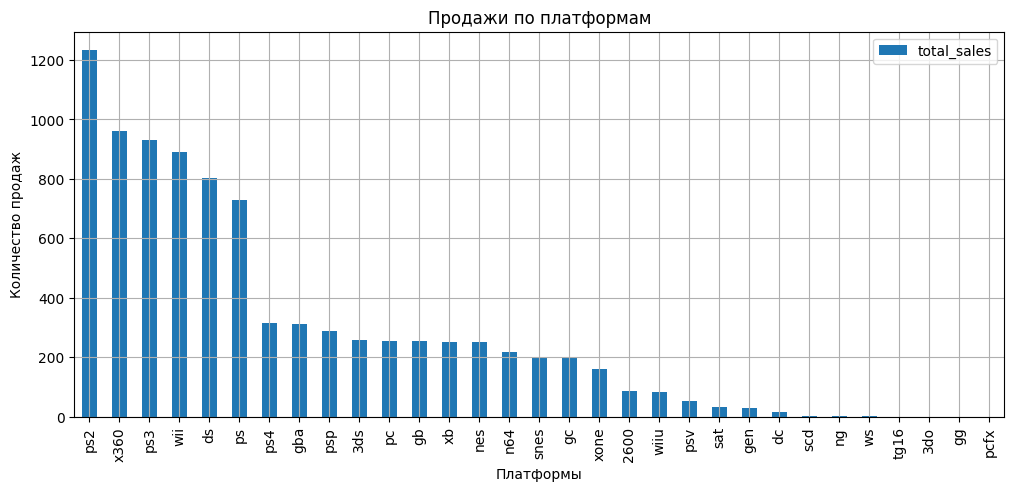

In [32]:
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind = 'bar', grid=True, figsize=(12, 5))
)
plt.title("Продажи по платформам")
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")
plt.show();

Из графика видно, что самые большие продажами у платформ: PS2, X360, PS3, Wii, DS, PS.

#### __Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. <br>Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.__

Для анализа возьмем первые 11 платформ, у которых самые большие продажи из графика выше, уберем данные до 1994 года, они нам не интересны, продаж было очень мало, все только развивалось

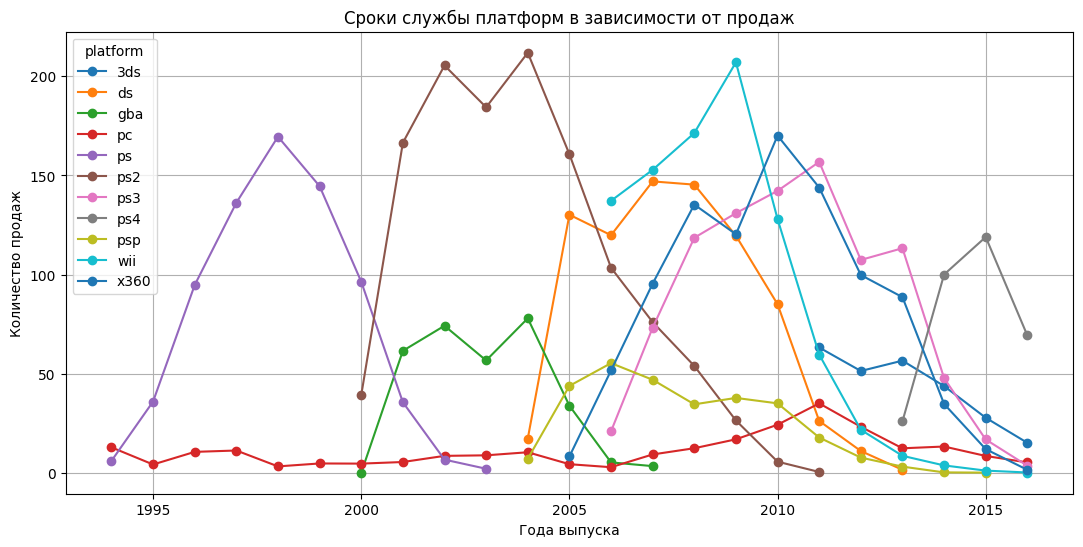

In [33]:
# Создадим новую переменную
top10_platform = data.query('platform == ["ps2","x360","ps3","wii","ds","ps","ps4","gba","psp","3ds","pc"]\
                                       and year_of_release >= 1994')

# Построим график
(
    top10_platform.pivot_table(index = 'year_of_release', columns = 'platform', values= 'total_sales', aggfunc = 'sum')
    .plot(style='o-', grid=True, figsize=(13, 6))
)
plt.title("Сроки службы платформ в зависимости от продаж")
plt.xlabel("Года выпуска")
plt.ylabel("Количество продаж")
plt.show();

Из графика видно, что средний срок службы платформы составляет 10 лет, плюс - минус 1-2 года. <br>
Долгожителем оказалась только **PC**, которая зародилась в начале 80-х годов прошлого века и существует до сих пор. Хотя огромными продажами за весь свой срок существования не выделялась, за исключением 2011 года, когда у них был пик продаж. <br>
Бесспорным лидером в начале 2000-ых был **PS2**. Оно и понятно, особо выбирать не приходилось. Новые платформы в основном начинали развиваться с 2005 года.<br>
Так же из графика можно заключить, что в первые 4-5 лет своего существования каждая платформа активно набирала обороты по продажам, а после так же активно шел спад. Это и естественно, т.к. технологии и прогресс не стоят на месте.

#### __Возьмем данные за соответствующий актуальный период, чтобы построить прогноз на 2017 год.__

Актуальным периодом для прогноза на 2017 год у нас будут последние 3 года - за 2014, 2015 и 2016 года (за 3 года, т.к. за 2016 год данные не полные). Этот период взят на основании выше изученных данных, т.к. взлет продаж приходится на первые годы жизни вновь образованной платформы, а также в этом промежутке остаюся только актуальные платформы.

In [34]:
# Создадим новую переменную и уберем данные до 2014 года
data_after_2014 = data[data['year_of_release'] >= 2014]

#### __Посмотрим, какие платформы лидируют по продажам, растут или падают.__

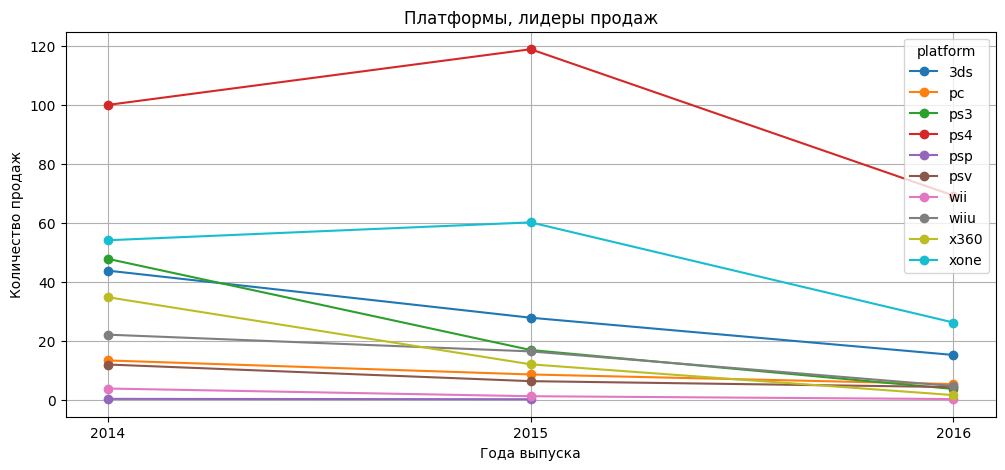

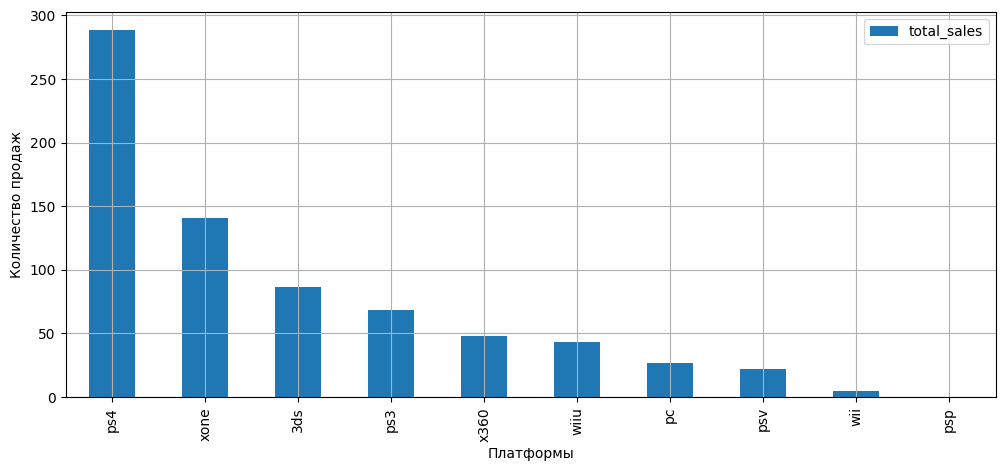

In [35]:
# Построим графики
(
    data_after_2014.pivot_table(index = 'year_of_release', columns = 'platform', values= 'total_sales', aggfunc = 'sum')
    .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.title("Платформы, лидеры продаж")
plt.xlabel("Года выпуска")
plt.ylabel("Количество продаж")
plt.xticks(np.arange(2014, 2017))

(
    data_after_2014.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind = 'bar', grid=True, figsize=(12, 5))
)
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")
plt.show();

Из графика мы видим, что в целом у всех платформ спад продаж. Но окончательный вывод делать рано, т.к. данные за 2016 год не полные. Лидерами продаж являются платформы **PS4**, **XOne** и **3DS**. Их можно отнести к потенциально прибыльным платформам. А так же к ним я бы отнес и платформу **РС**, т.к. за свои 30 с лишним лет своего существования стабильно находится на плаву и имеет более или менее стабильные продажи. 
А такие платформы, как **PSP** и **Wii** уже терпят крах. 

#### __Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.__

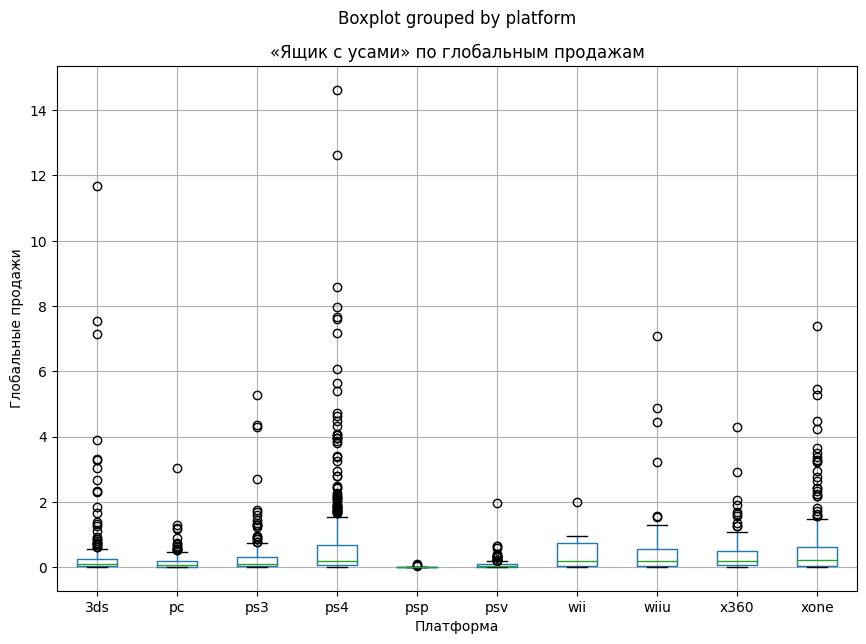

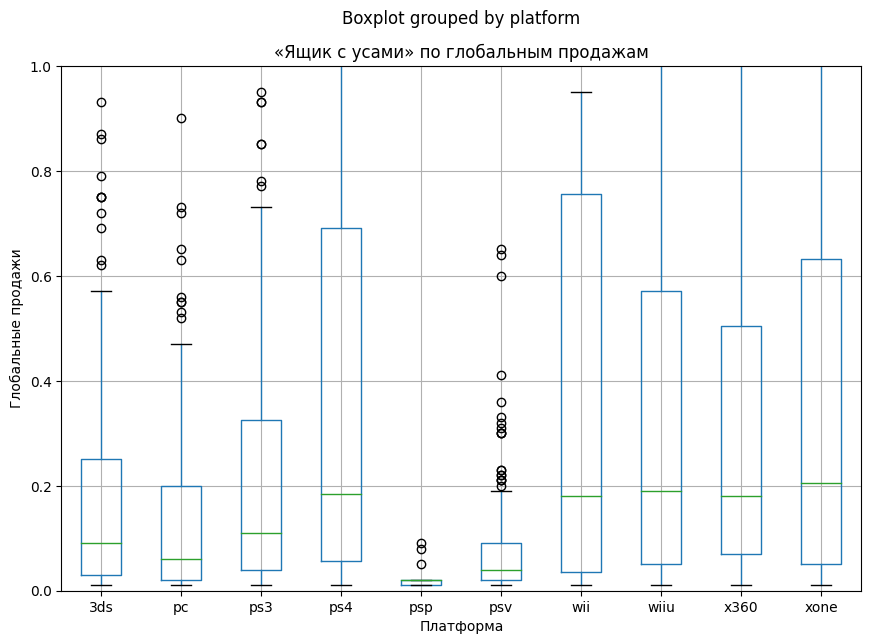

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
ps4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
3ds,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
xone,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
wiiu,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
ps3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
x360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
pc,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
psv,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96


In [36]:
# построим общую диаграмму размаха
data_after_2014.boxplot(column = ['total_sales'], by = ['platform'], figsize=(10, 7))                    
plt.title("«Ящик с усами» по глобальным продажам")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи")

data_after_2014.boxplot(column = ['total_sales'], by = ['platform'], figsize=(10, 7))
plt.ylim([0, 1])
plt.title("«Ящик с усами» по глобальным продажам")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи")
plt.show();

data_after_2014.groupby('platform')['total_sales'].describe().sort_values(by='max', ascending=False)

Из графиков мы видим, что у всех платформ большая часть значений больше медианы, а это значит, что игры для этих платформ продавались успешнее. 
Так же у всех платформ видим выбросы, у многих частые. Здесь можно предположить, что это игры с большими продажами или продаются лучше других или только для этой платформы. 
<br>Наиболее длинные ряды продаж у **PS4**, **XOne**, **3DS** и **WiiU**. Несмотря на то, что **X360**, **Wii** и **PS3** тоже имеют хорошие показатели, эти платформы пережиток прошлого и нам для анализа не подойдут.    
<br>
__P.S.__ Из всех последних графиков можно заключить, что платформы **PS4**, **XOne** и **3DS** можно считать потенциально прибльными. 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
__Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.__

Т.к. лидером по продажам последних пары лет является платфора **PS4**, то возьмем ее для анализа.

In [37]:
# Создадим новую переменную и сделаем срез по платформе PS4
data_ps4 = data_after_2014.query('platform == "ps4"')

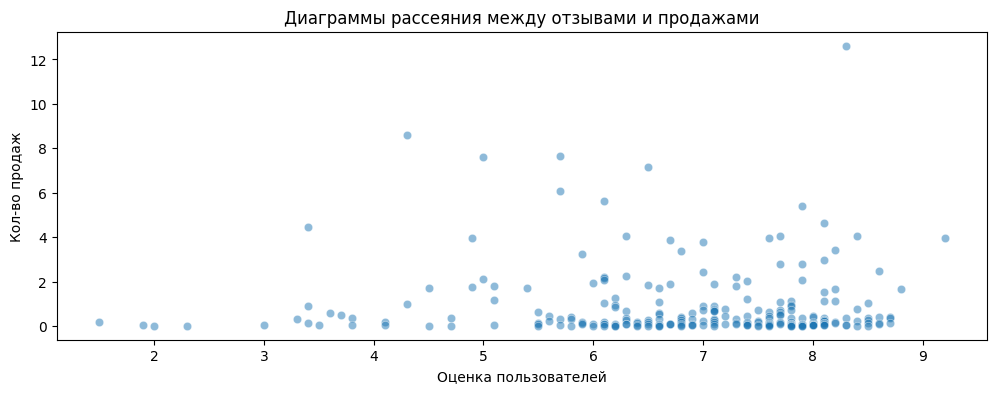

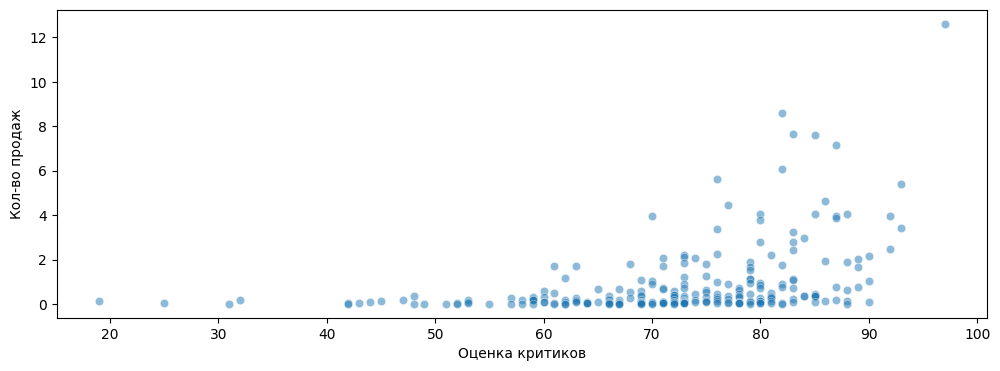

Корреляция между оценкой пользователей и продажами составляет:      -4%
Корреляция между оценкой критиков и продажами составляет:      40%


In [38]:
# Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами
plt.figure(figsize=(12,4))
sns.scatterplot(data=data_ps4, x="user_score", y="total_sales", alpha = 0.5)
plt.title("Диаграммы рассеяния между отзывами и продажами")
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во продаж")

plt.figure(figsize=(12,4))
sns.scatterplot(data=data_ps4, x="critic_score", y="total_sales", alpha = 0.5)
plt.xlabel("Оценка критиков")
plt.ylabel("Кол-во продаж")
plt.show();

print(f'Корреляция между оценкой пользователей и продажами составляет:\
      {data_ps4["user_score"].corr(data_ps4["total_sales"]):.0%}')

# Предыдущий код, только для столбца "critic_score" выдал ошибку: "AttributeError: 'float' object has no attribute 'shape'",
# Поменяем этому столбцу тип данных на 'float' 
print(f'Корреляция между оценкой критиков и продажами составляет:\
      {data_ps4["critic_score"].astype("float").corr(data_ps4["total_sales"]):.0%}')

Из проведенного анализа можно заключить, что оценки пользователей на продажи никак не влияют (корреляция очень слабая отрицательная 4%). А вот зависимость от оценки критиков более выражена. Корреляция 40%, слабая положительная. Потребители больше доверяют специалистам, чем таким же потребителям.

#### __Соотнесем выводы с продажами игр на других платформах.__

Для анализа возьмем платформы, которые мы считаем лидерам на основании предыдущих выводов: **WiiU**, **3DS**, **XOne** и **PC** (взял для анализа, т.к. до сих пор эта платформа на плаву). <br>Проделаем с ними ту же работу, что и с **PS4**.

In [39]:
# Создадим новые переменные аналогично PS4 для WiiU, 3DS, PC и XOne 
data_wiiu = data_after_2014.query('platform == "wiiu"')
data_3ds = data_after_2014.query('platform == "3ds"')
data_pc = data_after_2014.query('platform == "pc"')
data_xone = data_after_2014.query('platform == "xone"')

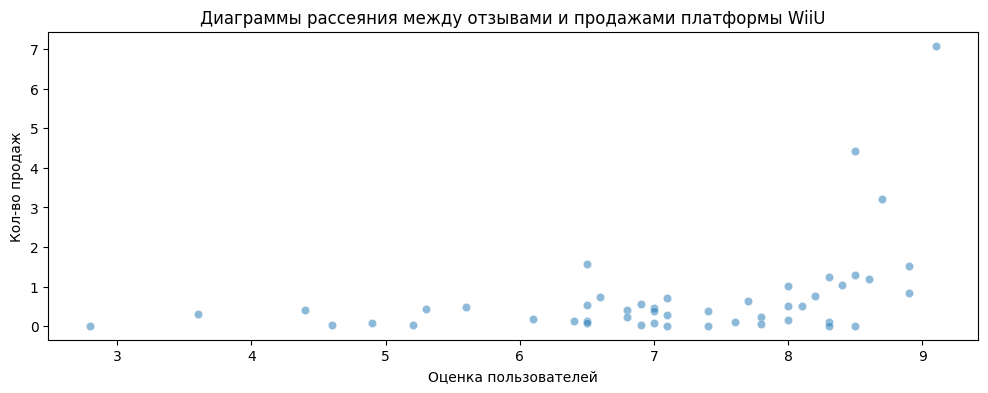

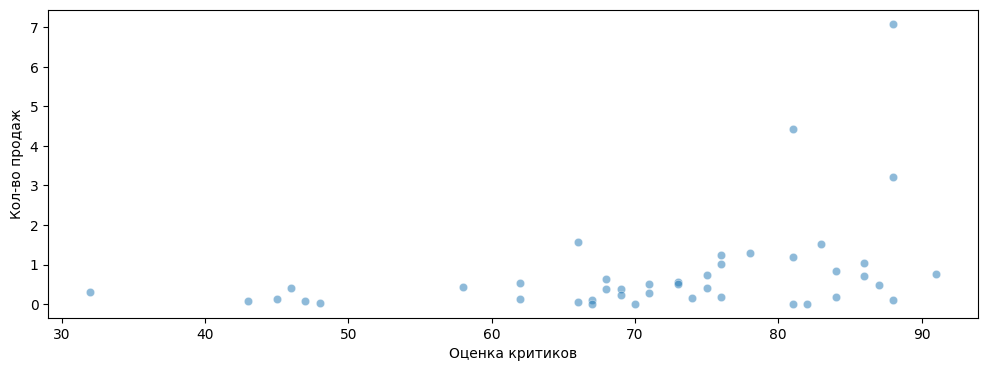

Платформа WiiU:
Корреляция между оценкой пользователей и продажами составляет:      41%
Корреляция между оценкой критиков и продажами составляет:      37%


In [40]:
# Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами по платформам
plt.figure(figsize=(12,4))
sns.scatterplot(data=data_wiiu, x="user_score", y="total_sales", alpha = 0.5)
plt.title("Диаграммы рассеяния между отзывами и продажами платформы WiiU")
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во продаж")

plt.figure(figsize=(12,4))
sns.scatterplot(data=data_wiiu, x="critic_score", y="total_sales", alpha = 0.5)
plt.xlabel("Оценка критиков")
plt.ylabel("Кол-во продаж")
plt.show();

print('Платформа WiiU:')
print(f'Корреляция между оценкой пользователей и продажами составляет:\
      {data_wiiu["user_score"].corr(data_wiiu["total_sales"]):.0%}')
print(f'Корреляция между оценкой критиков и продажами составляет:\
      {data_wiiu["critic_score"].astype("float").corr(data_wiiu["total_sales"]):.0%}')

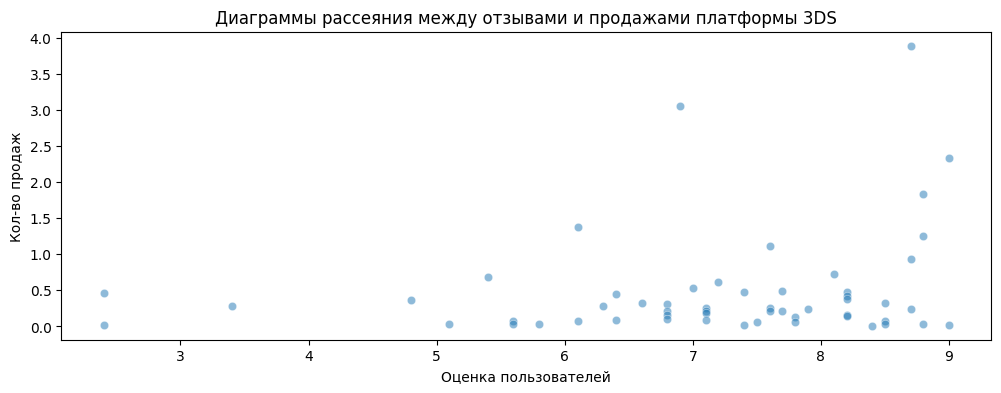

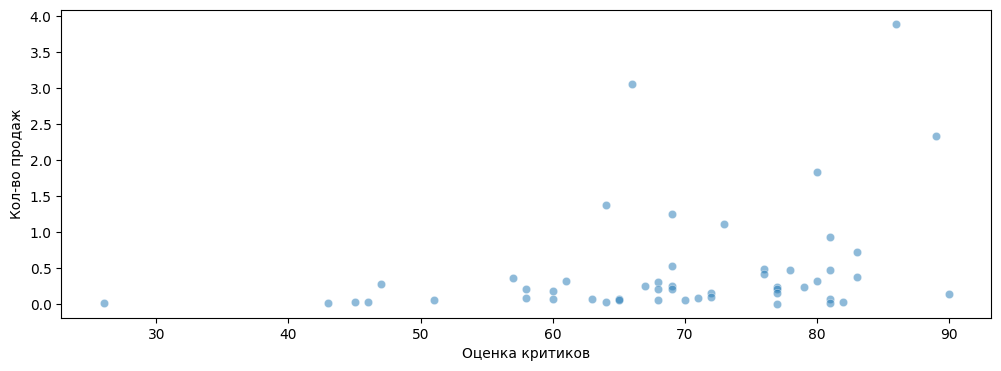

Платформа 3DS:
Корреляция между оценкой пользователей и продажами составляет:      22%
Корреляция между оценкой критиков и продажами составляет:      31%


In [41]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=data_3ds, x="user_score", y="total_sales", alpha = 0.5)
plt.title("Диаграммы рассеяния между отзывами и продажами платформы 3DS")
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во продаж")

plt.figure(figsize=(12,4))
sns.scatterplot(data=data_3ds, x="critic_score", y="total_sales", alpha = 0.5)
plt.xlabel("Оценка критиков")
plt.ylabel("Кол-во продаж")
plt.show();

print('Платформа 3DS:')
print(f'Корреляция между оценкой пользователей и продажами составляет:\
      {data_3ds["user_score"].corr(data_3ds["total_sales"]):.0%}')
print(f'Корреляция между оценкой критиков и продажами составляет:\
      {data_3ds["critic_score"].astype("float").corr(data_3ds["total_sales"]):.0%}')

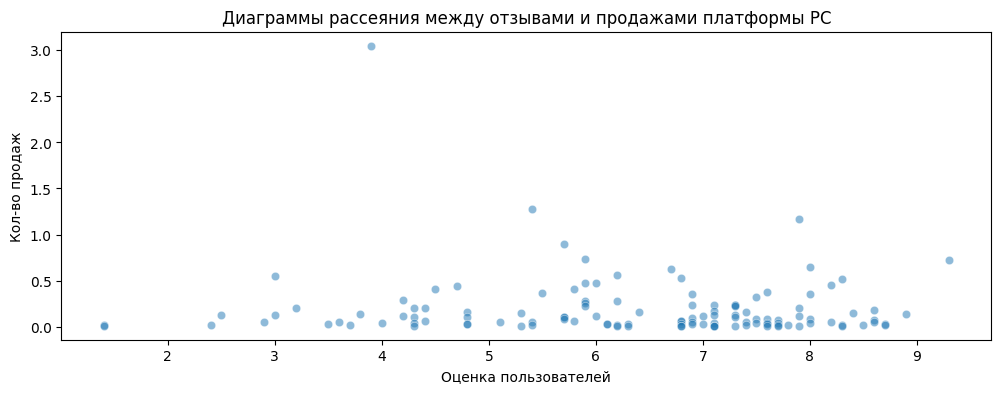

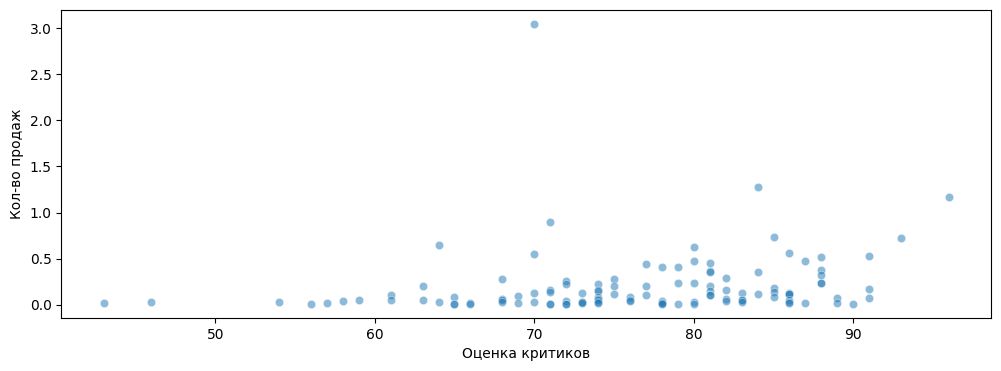

Платформа PC:
Корреляция между оценкой пользователей и продажами составляет:      -7%
Корреляция между оценкой критиков и продажами составляет:      17%


In [42]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=data_pc, x="user_score", y="total_sales", alpha = 0.5)
plt.title("Диаграммы рассеяния между отзывами и продажами платформы PC")
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во продаж")

plt.figure(figsize=(12,4))
sns.scatterplot(data=data_pc, x="critic_score", y="total_sales", alpha = 0.5)
plt.xlabel("Оценка критиков")
plt.ylabel("Кол-во продаж")
plt.show();

print('Платформа PC:')
print(f'Корреляция между оценкой пользователей и продажами составляет:\
      {data_pc["user_score"].corr(data_pc["total_sales"]):.0%}')
print(f'Корреляция между оценкой критиков и продажами составляет:\
      {data_pc["critic_score"].astype("float").corr(data_pc["total_sales"]):.0%}')

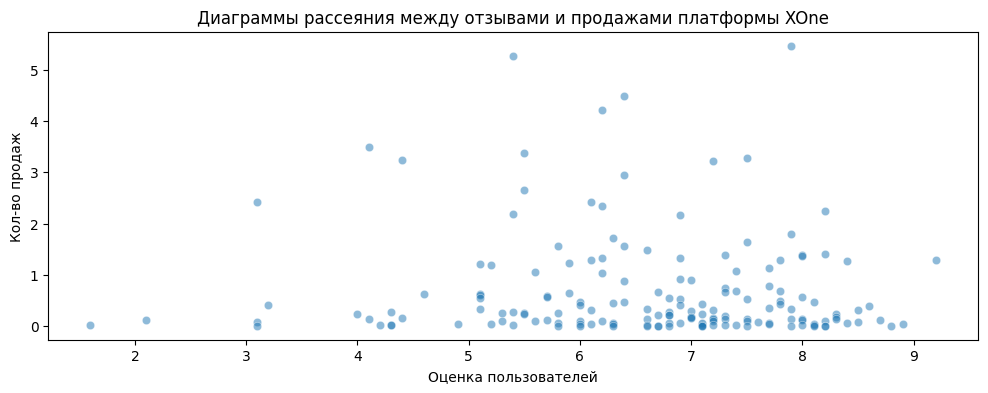

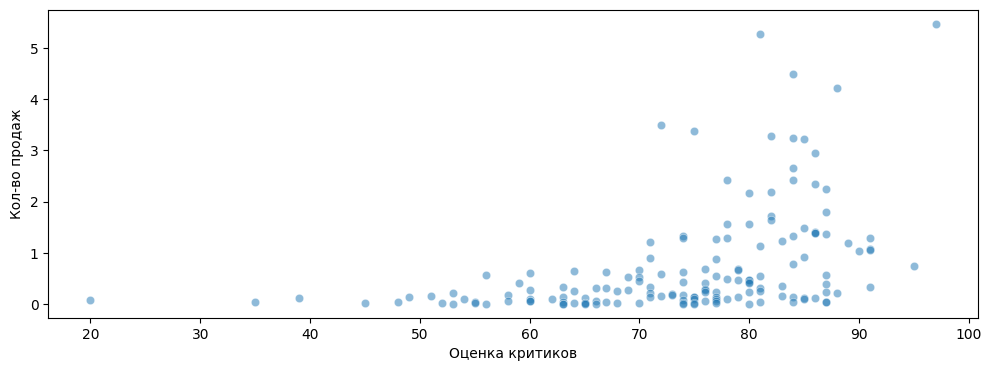

Платформа XOne:
Корреляция между оценкой пользователей и продажами составляет:      -7%
Корреляция между оценкой критиков и продажами составляет:      43%


In [43]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=data_xone, x="user_score", y="total_sales", alpha = 0.5)
plt.title("Диаграммы рассеяния между отзывами и продажами платформы XOne")
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во продаж")

plt.figure(figsize=(12,4))
sns.scatterplot(data=data_xone, x="critic_score", y="total_sales", alpha = 0.5)
plt.xlabel("Оценка критиков")
plt.ylabel("Кол-во продаж")
plt.show();

print('Платформа XOne:')
print(f'Корреляция между оценкой пользователей и продажами составляет:\
      {data_xone["user_score"].corr(data_xone["total_sales"]):.0%}')
print(f'Корреляция между оценкой критиков и продажами составляет:\
      {data_xone["critic_score"].astype("float").corr(data_xone["total_sales"]):.0%}')

__Подведем итог.__<br> Для начала назначим диапазон, что мы будем считать сильной и слабой корреляцией. 
- до 20% - очень слабая
- до 50% - слабая
- до 70% - средняя
- до 90% - высокая
- свыше 90% - очень высокая<br>

В целом у всех платформ корреляция от оценок критиков одикаковая и схожая с платформой __PS4__: слабая положительная зависимость (_от 31% до 43%_). Выбивается только по платформе __PC__ - очень слабая положительная (_17%_). <br>
А вот корреляция от оценок пользователей отличается с некоторыми патформами. У __PS4__ схожа с __PC__ и __XOne__ (очень слабая отрицательная _7%_), а от **WiiU** и **3DS** отличается (у данных платформ слабая положительная зависимость _22 - 41%_).  

#### __Посмотрим на общее распределение игр по жанрам.__

Думаю, самыми прибыльными будут *«бродилки»* и *«стрелялки»*.

,total_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


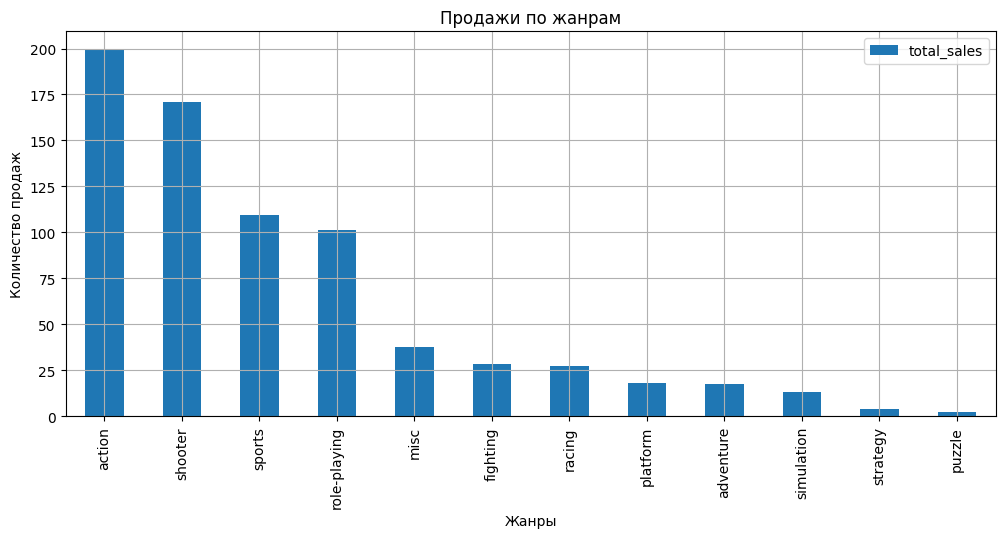

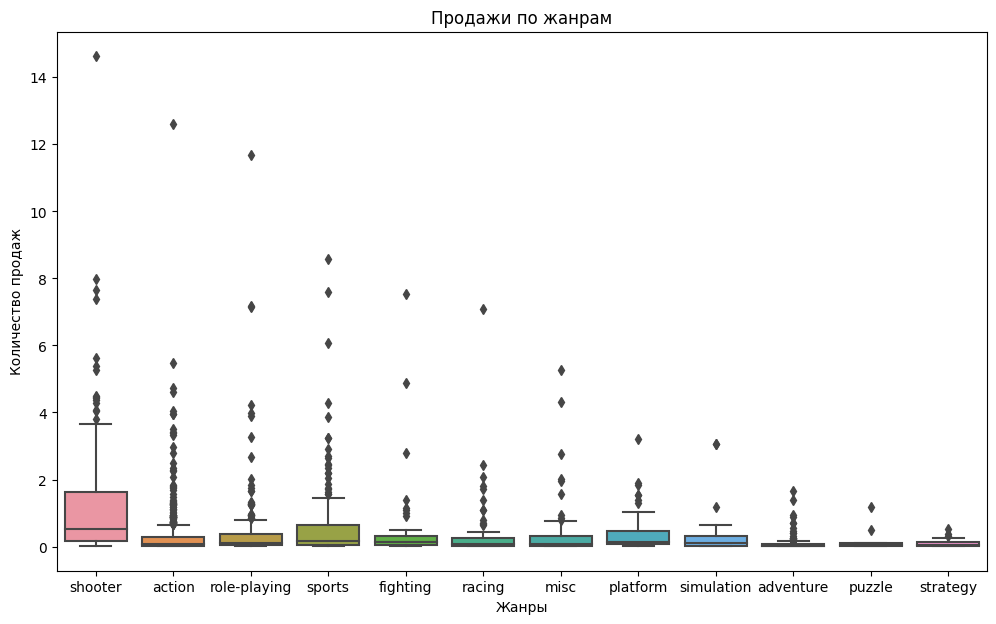

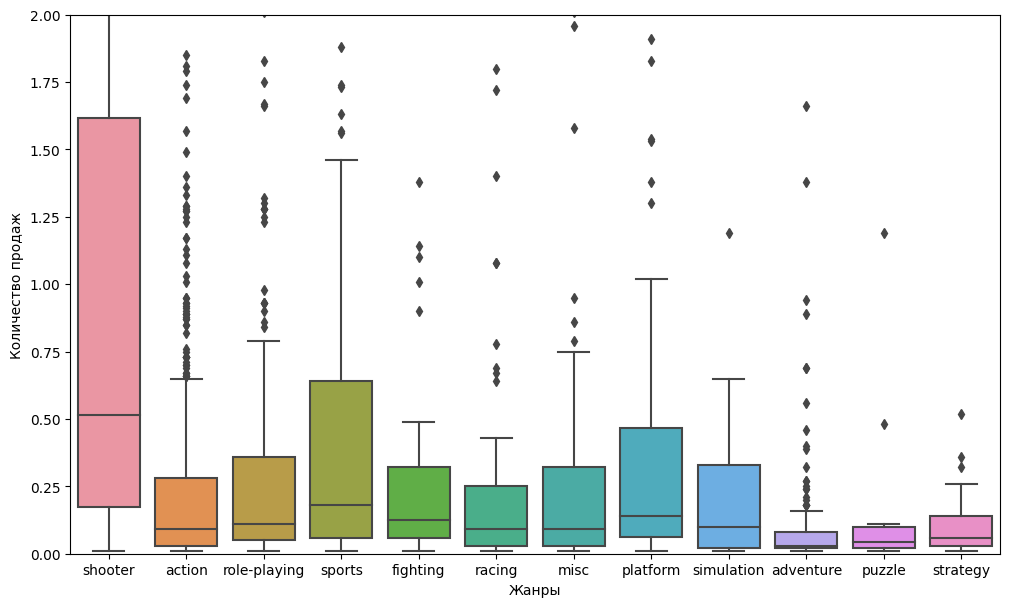

In [44]:
# Сделаем сводную таблицу по жанрам, выведем на экран и построим графики
data_genre = data_after_2014.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
             .sort_values(by='total_sales', ascending=False)
display(data_genre)

data_genre.plot(kind = 'bar', grid=True, figsize=(12, 5))
plt.title("Продажи по жанрам")
plt.xlabel("Жанры")
plt.ylabel("Количество продаж")

plt.figure(figsize=(12,7))
sns.boxplot(data=data_after_2014, x='genre', y='total_sales')
plt.title("Продажи по жанрам")
plt.xlabel('Жанры')
plt.ylabel('Количество продаж')

plt.figure(figsize=(12,7))
sns.boxplot(data=data_after_2014, x='genre', y='total_sales')
plt.ylim([0, 2])
plt.xlabel('Жанры')
plt.ylabel('Количество продаж')
plt.show();

Предположение подтвердилось. Из столбчатой диаграммы видно, что самые прибыльные жанры __Action__ и __Shooter__, далее __Sports__ и __Role-Playing__. Но из диаграммы размаха видно другое, что лучше продаются __Shooter__ и __Sports__, медианы продаж у них выше, чем у других жанров. Оно и понятно, пол основного потребителя мужской. А что нужно мальчишкам? Правильно, побегать, подраться и пострелять. Из этого следует, что __Shooter__ можно считать самым подходящим жанром для продаж. К самым невостребованным относятся жанры __Adventure__, __Strategy__ и __Puzzle__.  

### Составим портрет пользователя каждого региона

#### __Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).__

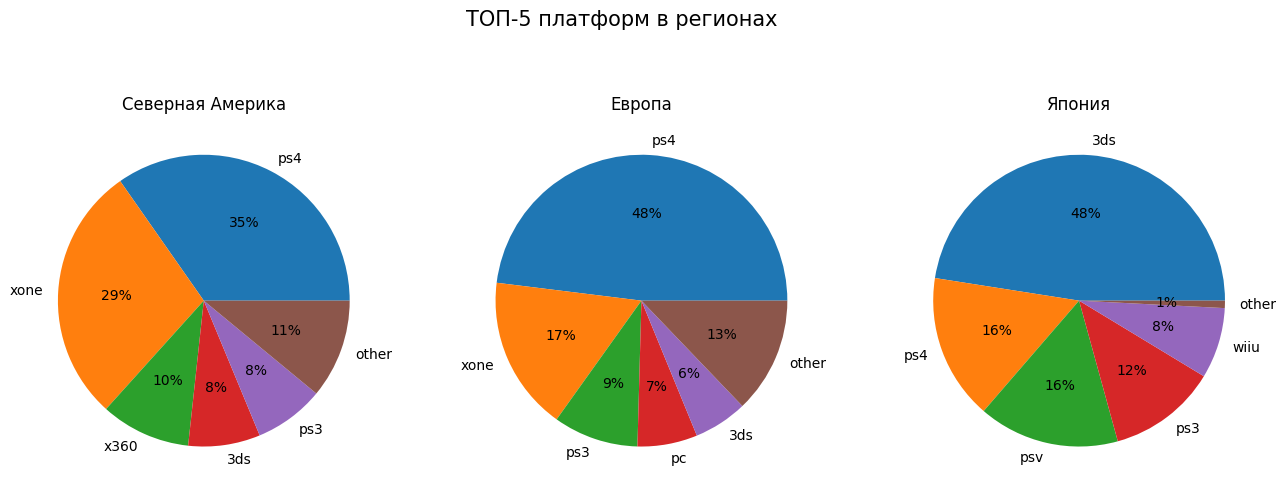

In [45]:
# В новых переменных создадим список регионов и наименования регионов для графиков
regions = data_after_2014.columns[4:7]
region_name = ['Северная Америка', 'Европа', 'Япония']

# Построим графики по каждому региону с 5-ю самыми популярными пратформами через цикл
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('ТОП-5 платформ в регионах', fontsize=15)
for i in range(3):
    df = (data_after_2014.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head())
    df = df.append({'platform': 'other', regions[i]: data_after_2014[regions[i]]
                        .sum() - df[regions[i]].sum()}, ignore_index= True)
    axs[i].pie(df[regions[i]], labels = df['platform'], autopct='%1.f%%')
    axs[i].set_title(region_name[i])
plt.show()

В *Америке* и *Европе* лидеры продаж схожи. Первое место за платформой __PS4__ (*35%* от общей доли внутри рынка и *48%* соответственно), второе место за __XOne__ (*29%* и *17%*). С 3-й по 5-ю строчки в *Америке* занимают __X360__, __3DS__ и __PS3__, а в *Европе* за __PS3__, __PC__ и __3DS__. Играм других платформ в этих регионах принадлежит *11%* и *13%* рынков.
Платформы __XOne__ и __WiiU__ и в том и в том регионах занимают 4 и 5 места. 
<br>В целом можно сказать, что рынки *Америки и Европы* похожи, производителям японских платформ принадлежит большая доля рынков.

В *Японии* рынок платформ представлен из собственного производства. Оно и понятно, такое разнообразие платформ от местных производителей. ТОП-5 представлен исключительно из них. Лидером является __3DS__ (*48%*), за ним следуют __PS4__, __PSV__, __PS3__, и __WiiU__. Все остальные платформы занимают только *1%* рынка.

#### __Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).__ 

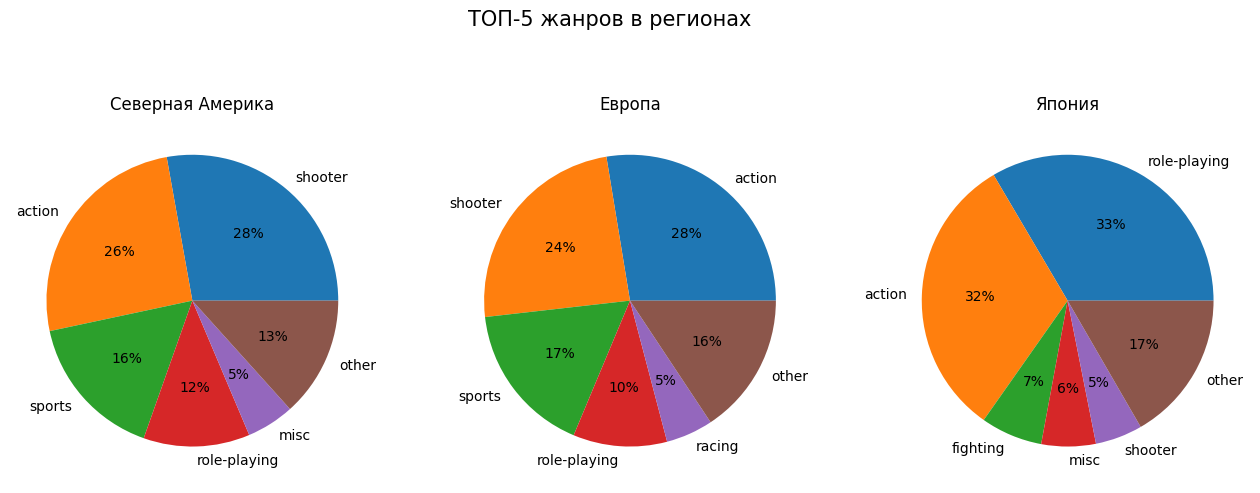

In [46]:
# Так же построим графики по каждому региону с 5-ю самыми популярными жанрами через цикл
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('ТОП-5 жанров в регионах', fontsize=15)
for i in range(3):
    df = (data_after_2014.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head())
    df = df.append({'genre': 'other', regions[i]: data_after_2014[regions[i]]
                        .sum() - df[regions[i]].sum()}, ignore_index= True)
    axs[i].pie(df[regions[i]], labels = df['genre'], autopct='%1.f%%')
    axs[i].set_title(region_name[i])
plt.show()

Предпочтения по жанрам в *Америке и Европе* по большей части схожи. 4 из ТОП-5 представлены: __Action__, __Shooter__, __Sports__, __Role-Playing__. В *Америке* на первом месте __Shooter__, в *Европе* - __Action__ (по *28%*), а на вторых местах эти же жанры, только наоборот (*26%* и *24%*). Отличие только в 5- строчке. В *Америке* больше любят __Сетевые стрелялки__, а в *Европе* - __Гонки__. Всем остальным жанрам отводится по *13%* и *16%* спроса.

В *Японии* тоже любят игры жанра __Экшен__ (*32%*), но больше всего предпочитают __Ролевые игры__ (*33%*). Я бы сказал, что эти жанры делят между собой рынок. Далее расположились __Fighting__, __Сетевые стрелялки__ и __Симуляторы__. Всем остальным - *17%*.

#### __Определим для пользователя каждого региона (NA, EU, JP) влияние рейтинга ESRB на продажи в отдельном регионе.__

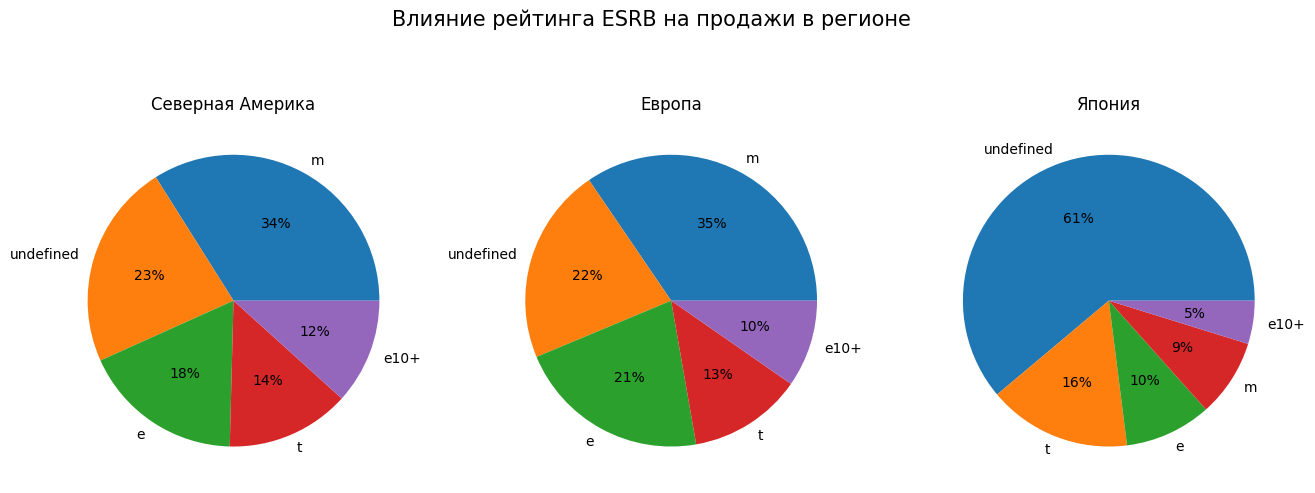

In [47]:
# Снова построим графики через цикл
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионе', fontsize=15)
for i in range(3):
    df = (data_after_2014.groupby('rating')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head())
    axs[i].pie(df[regions[i]], labels = df['rating'], autopct='%1.f%%')
    axs[i].set_title(region_name[i])
plt.show()

Напомним, какие __рейтинги__ у нас остались: <br>

«E» — «Для всех»<br>
«E10+» — «Для всех старше 10 лет»<br>
«T» — «Подросткам»<br>
«M» — «От 17 лет» (для взрослых)<br>

В *Америке и Европе* полностью совпадают пристрастия, по долям практически совподают. Больше всего продаж игр с рейтингом __«От 17 лет»__ (*34%* и *35%*), далее идут игры без рейтинга (*23%* и *22%*), на 3-ем месте __«Для всех»__ (*18%* и *21%*) и замыкают __«Подросткам»__ и __«Для всех старше 10 лет»__.
<br>В *Японии* львиная доля принадлежит играм без рейтинга (*61%*). На втором месте игры с рейтингом __«Подросткам»__ (*16%*). А далее идут все оставшиеся: __«Для всех»__, __«От 17 лет»__ и __«Для всех старше 10 лет»__.

***Вывод*** из проведенного анализа можно сделать следующий, что __портрет пользователя каждого региона__ выглядит так: <br>

**Североамериканские пользователи:**<br>
Предпочитают играть на платформах как японского так и своего производства - __PS4__ и __XOne__, в игры жанров __Shooter__ и __Action__ рейтинга __«От 17 лет»__.
Обьяснить это можно легко, достаточно вспомнить какие фильмы они снимают: где много действия, стрельбы, насилия и крови.<br>

**Европейские пользователи**<br>
Играют на платформах больше японского производства __PS4__, в игры жанров __Action__ и __Shooter__ рейтинга __«От 17 лет»__.

**Японские пользователи**<br>
Играют исключительно на платформе своего производства, в основном __3DS__, в __Ролевые игры__ и __Action__  без рейтинга.

### Проверим гипотезы

__Гипотеза № 1:__ *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*<br>
__Гипотеза № 2:__ *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

__Проверим первую гипотезу__<br>
*Нулевая гипотеза*: средние пользовательские рейтинги платформ __Xbox One__ и __PC__ одинаковые.<br>
*Альтернативная гипотеза*: средние пользовательские рейтинги платформ __Xbox One__ и __PC__ разные.

Для проверки гипотезы используем метод `ttest_ind()` для независимых выборок.

In [48]:
# Назначим новые переменные, сделаем соответствующие пользовательские выборки по анализируемым платформам и
# удалим пустые значения по столбцу пользовательских оценок.
user_score_xone = data_after_2014[data_after_2014['platform'] == "xone"]['user_score'].dropna()
user_score_pc = data_after_2014[data_after_2014['platform'] == "pc"]['user_score'].dropna()

# Выведем средние пользовательские рейтинги платформ на экран
print('Средний пользовательский рейтинг платформы Xbox One:', user_score_xone.mean())
print('Средний пользовательский рейтинг платформы PC', user_score_pc.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705


<AxesSubplot:>

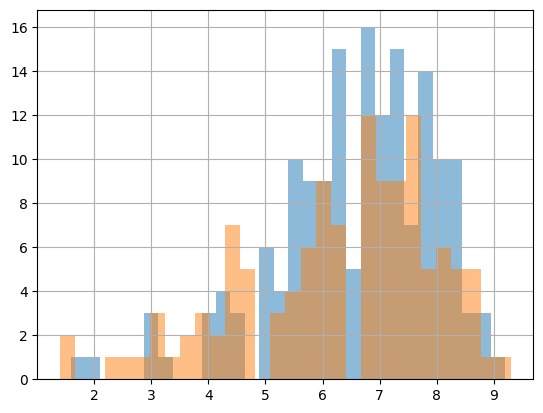

In [49]:
user_score_xone.hist(bins = 30, alpha=0.5)
user_score_pc.hist(bins = 30, alpha=0.5)

In [50]:
from scipy import stats as st

alpha = 0.05

results = st.shapiro(user_score_xone)

p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:

    print('Отвергаем нулевую гипотезу: распределение не нормально')

else:

    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  2.564911119407043e-05
Отвергаем нулевую гипотезу: распределение не нормально


In [51]:
# Назначим уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу
alpha = .05 

# Проведем тест 
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False) 

# Выведем на экран получившееся p-значение и сравнис с alpha
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


__Первую гипотезу__ опровергнуть не получилось, т.к. нулевая гипотеза не отвергнута, следовательно средние пользовательские рейтинги платформ __Xbox One__ и __PC__ больше одинаковые, чем разные.

__Теперь проверим вторую гипотезу__<br>
*Нулевая гипотеза*: средние пользовательские рейтинги жанров __Action__ и __Sports__ одинаковые.<br>
*Альтернативная гипотеза*: средние пользовательские рейтинги жанров __Action__ и __Sports__ разные.
<br><br>
Для проверки гипотезы также используем метод `ttest_ind()`.

In [52]:
# Повторим действия из предыдущей проверки, только пользовательская выборка будет по жанрам
user_score_action = data_after_2014[data_after_2014['genre'] == "action"]['user_score'].dropna()
user_score_sports = data_after_2014[data_after_2014['genre'] == "sports"]['user_score'].dropna()

# Выведем средние пользовательские рейтинги жанров на экран
print('Средний пользовательский рейтинг жанра Action:', user_score_action.mean())
print('Средний пользовательский рейтинг жанра Sports', user_score_sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


In [53]:
# Назначим уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу
alpha = .05 

# Проведем тест 
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False) 

# Выведем на экран получившееся p-значение и сравним с alpha
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


__По второй гипотезе__: мы отвергли нулевую гипотезу, а это значит, что средние пользовательские рейтинги жанров __Action__ и __Sports__ больше разные, чем одинаковые.

### Общий вывод

Мы открыли файл с данными и изучили общую информацию. __Провели__ необходимую __предобработку__ столбцов: заменили названия столбцов и значения (привели к нижнему регистру), преобразовали данные в нужные типы, обработали пропуски, где это возможно.
Отдельно обратили внимание на аббревиатуру __'tbd'__ в столбце с оценкой пользователей, которая означает *To Be Determined* (будет определено) или *To Be Decided* (будет решено), т.е. не заполнена целенаправленно, заменили значения на *NaN*. А так же посчитали и записали в отдельный столбец суммарные продажи во всех регионах.

Провели анализ и выяснили, что до 1994 года выпуск игр был минимальным. Далее с развитием компьтерных технологий пошел рост в разработке и выпуске игр. Пик пришелся на 2008 - 2009 года.

Средний срок службы платформы составляет 10 лет. Долгожителем оказалась только платформа __PC__. При чем в первые 4-5 лет своей жизни каждая платформа активно набирала обороты по продажам, а после шел спад.

Для прогноза на 2017 год выделили данные для анализа за последние 3 года (2014, 2015, 2016 г.г.) и увидели, что: 
- лидерами продаж последних лет являются платформы **PS4**, **XOne** и **3DS**. Их можно отнести к потенциально прибыльным платформам; 
- оценки пользователей разделились 50/50, по некоторым платформам влияют на продажи (**WiiU** и **3DS**), по некоторым нет (__PS4__, __PC__ и __XOne__); а вот оценки критиков имеют влияние, пользователям важно мнение специалистов;
- самые прибыльные жанры __Shooter__ и __Action__.

После чего составили __портрет пользователя каждого региона__. <br>
Все регионы предпочитают платформы японских производителей (__PS4__ и __3DS__ соответственно). Жанры игр и их рейтин схож у американцев и евромейцев. И те и другие предпочитают __Shooter__ и __Action__ с рейтингом __«От 17 лет»__, а японцы любят __Ролевые игры__ и __Action__ без рейтинга. 

Кроме того, мы проверили две гипотезы и определили, что средние пользовательские рейтинги платформ __Xbox One__ и __PC__ одинаковые, а средние пользовательские рейтинги жанров __Action__ и __Sports__ разные.

И в завершении, можно заключить, чтобы продажи имели успех, нужно производить игры жанров __Action__ и __Shooter__ с рейтингом __«От 17 лет»__ для платформ **PS4**, **XOne** и **3DS**, а так же __Ролевые игры__.